# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Прикладные задачи анализа данных" </center>

# <center> Network Analysis </center>

# Table of contents  
  
1. []()
2. []()
3. []()

## Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
G_data = pd.read_csv('movie_actors/movie_actors.net', sep=' ', header=None, names=['actor_1', 'actor_2'])

In [3]:
G_data.shape

(8302734, 2)

In [4]:
Actors = pd.read_csv('movie_actors/movie_actors_names_dists', header=None, sep=':', names=['id', 'name'])
Actors['name'] = [x.split('\t')[1] for x in Actors['name']]
Actors.head(10)

,id,name
0,0,"Bacon, Kevin"
1,1,"Buffington, Bryan"
2,2,"Jones, James Earl"
3,3,"Irizarry, Vincent"
4,4,"Bolger, John"
5,5,"Newman, Robert"
6,6,"Tylo, Michael"
7,7,"Phillips, Joseph C."
8,8,"Katsulas, Andreas"
9,9,"Bernau, Christopher"


## Network

In [5]:
import networkx as nx

In [6]:
np.random.seed(469473)
edges = np.random.choice(G_data.index, 10000)

In [7]:
G = nx.from_pandas_edgelist(G_data.loc[edges], source='actor_1', target='actor_2')

In [8]:
round(nx.density(G), 7)

6.94e-05

In [9]:
N = nx.number_of_nodes(G)
M = nx.number_of_edges(G)
round(M / (N * (N-1) / 2), 7)

6.94e-05

### Degree destribution

In [10]:
degrees = dict(nx.degree(G))
degrees_list = pd.Series([x for x in degrees.values()]).value_counts()
degrees_list

1    14667
2     1771
3      382
4      114
5       25
6        4
7        2
8        1
dtype: int64

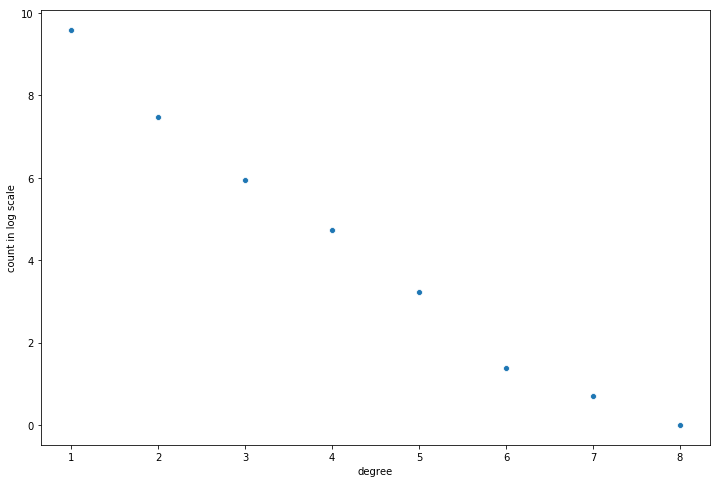

In [11]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=degrees_list.index, y=np.log(degrees_list))
plt.xlabel('degree')
plt.ylabel('count in log scale')
plt.show()

In [12]:
from collections import defaultdict

In [13]:
degree_inv = defaultdict(list)
for k, v in degrees.items():
    degree_inv[v].append(k)

In [16]:
for d in degrees_list.tail(4).index: 
    print('Degree', d , 'for', '; '.join(list(Actors['name'][degree_inv[d]])))

Degree 5 for Woods, James; Dekker, Albert; O'Brien, Pat; Bates, Kathy; Bogart, Humphrey; Lerner, Michael; Fix, Paul; Shaye, Lin; Plimpton, George; Ridgely, John; Homans, Robert; Bush, Grand L.; Woods, Harry M.; Diaz, Maria; Keith, Brian; Walsh, M. Emmet; Mower, Jack; Clarke, Mae; London, Tom; Bacon, Irving; Fowley, Douglas; Clive, E.E.; Cooper, Gary; Smack Jr., Dion; Strang, Harry
Degree 6 for Boteler, Wade; Vogan, Emmett; Burke, James (I); Flower, George 'Buck'
Degree 7 for Jackson, Selmer; Madsen, Michael
Degree 8 for Warwick, Robert


### Centrality

In [17]:
dc = nx.degree_centrality(G)
print(*sorted(dc.items(), key=lambda x: (-x[1], x[0]))[:10])

(19986, 0.0004715590922487474) (10059, 0.00041261420571765396) (18820, 0.00041261420571765396) (8898, 0.00035366931918656057) (18087, 0.00035366931918656057) (20351, 0.00035366931918656057) (45467, 0.00035366931918656057) (630, 0.0002947244326554671) (3415, 0.0002947244326554671) (5547, 0.0002947244326554671)


In [18]:
dcl = nx.closeness_centrality(G)
print(*sorted(dcl.items(), key=lambda x: (-x[1], x[0]))[:10])

(45788, 0.0011357396248765593) (45606, 0.0011038368264249705) (132671, 0.0010697801548292818) (94672, 0.001037762086815025) (100171, 0.0010233487244981497) (94759, 0.0009791509390547082) (45237, 0.0009726878965526967) (140490, 0.0009568975086216465) (94621, 0.000937120612577002) (45467, 0.0009138742097843941)


In [19]:
db = nx.betweenness_centrality(G)
print(*sorted(db.items(), key=lambda x: (-x[1], x[0]))[:10])

(45788, 2.401020784778682e-05) (132671, 1.9687675494292347e-05) (45606, 1.692876014969861e-05) (94672, 1.3752880269398008e-05) (100171, 1.2126718580141244e-05) (45237, 1.192518572121626e-05) (97081, 1.1668057590863696e-05) (70406, 1.1466524731938712e-05) (94621, 1.093142024444824e-05) (140490, 9.916806540894873e-06)


### Small world

### Clustering 

#### Local clustering coef

In [20]:
loc_cl = nx.clustering(G)
print(*sorted(loc_cl.items(), key=lambda x: (-x[1], x[0]))[:10])

(22236, 1.0) (20345, 0.3333333333333333) (20328, 0.16666666666666666) (0, 0) (2, 0) (8, 0) (11, 0) (32, 0) (37, 0) (39, 0)


#### Average clustering coef

In [21]:
avrg_cl = nx.average_clustering(G)
avrg_cl

8.841211835435577e-05

#### Global clustering coef

In [22]:
nx.transitivity(G)

0.0007535795026375283

#### Modularity based clustering

In [24]:
from networkx.algorithms.community import greedy_modularity_communities

In [26]:
mod_cl = greedy_modularity_communities(G)

In [28]:
len(mod_cl)

6976

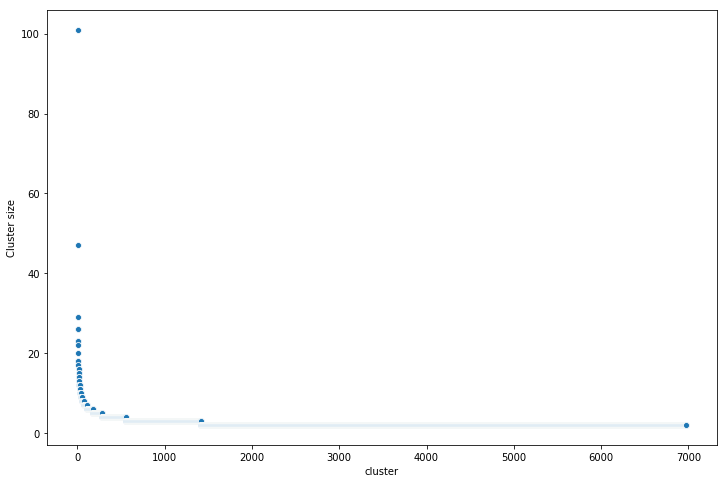

In [31]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=range(1, len(mod_cl) + 1), y=[len(x) for x in mod_cl])
plt.xlabel('cluster')
plt.ylabel('Cluster size')
plt.show()

In [32]:
nx.density(G.subgraph(mod_cl[0]))

0.019801980198019802